<a href="https://colab.research.google.com/github/noorArizqi/Sistem-Temu-Kembali/blob/master/TensorFlow_tulisan_tangan_angka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2934 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1397 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1024 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0841 - accuracy: 0.9741
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9773
Accuracy on test data: 0.9772999882698059
313/313 [==============================] - 1s 2ms/step


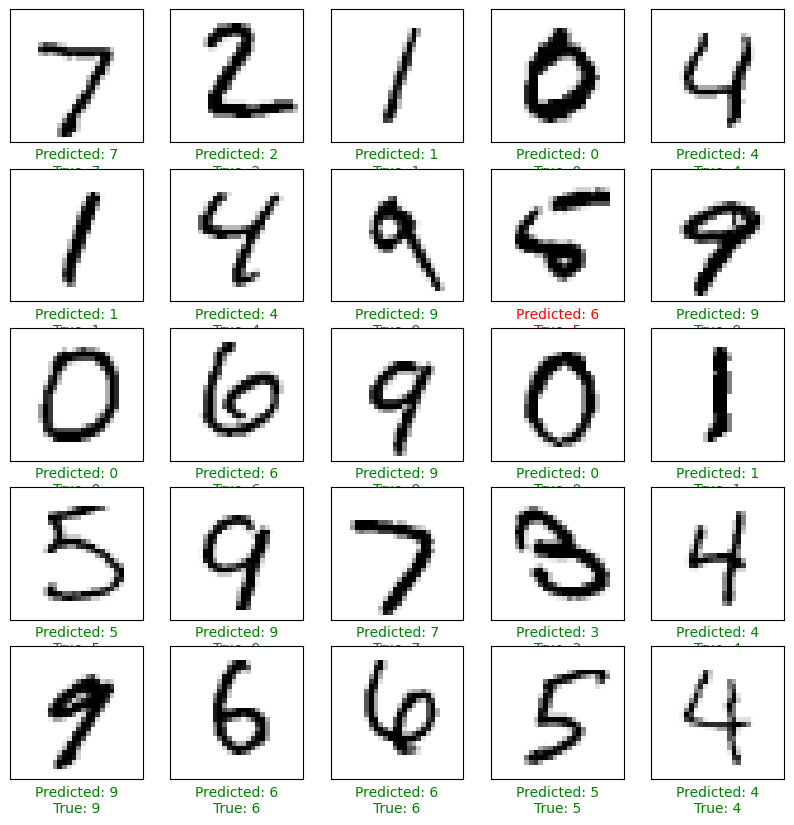

In [37]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Muat dataset MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Membuat model jaringan saraf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Lapisan masukan
    keras.layers.Dense(128, activation='relu'),  # Lapisan tersembunyi
    keras.layers.Dropout(0.2),  # Regularisasi Dropout
    keras.layers.Dense(10, activation='softmax')  # Lapisan keluaran
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(train_images, train_labels, epochs=5)

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy on test data: {test_acc}')

# Prediksi gambar tangan angka
predictions = model.predict(test_images)

# Menampilkan hasil prediksi pada gambar
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}\nTrue: {true_label}', color=color)
plt.show()
